<a href="https://colab.research.google.com/github/BrunoDkno368/ETL-EDA-METRICAS/blob/main/ETL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ETL

# EXTRAT (T)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/EDA practica/ventas_reglas_negocio.csv')
df.sample(5)

,id_venta,fecha,cliente,producto,categoria,cantidad,precio_unitario,descuento,metodo_pago,ciudad,total_venta
1502,1503,2024-01-26,Noa Jaén Montalbán,Silla Gamer,Muebles,9,2333.71,0.37,tarjerta,Buenos Aires,13232.14
1995,1996,2024-05-15,Nadia Godoy Sureda,Teclado,Electrónica,10,1948.18,0.26,Efectivo,Salta,14416.53
1446,1446,2025-02-08,Lourdes Paola Vilanova Pedraza,Impresora,Oficina,3,360.33,0.06,tarjerta,Tucumán,1016.13
1189,1190,2025-01-07,Josué Coloma Tirado,Laptop,Electrónica,8,540.25,NaN,NaN,Mendoza,3760.14
604,605,2025-03-13,Reina Heredia Pujadas,Laptop,Electrónica,2,1650.53,NaN,Tarjeta,Córdoba,2706.87


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_venta         2000 non-null   int64  
 1   fecha            1951 non-null   object 
 2   cliente          1912 non-null   object 
 3   producto         2000 non-null   object 
 4   categoria        1911 non-null   object 
 5   cantidad         2000 non-null   int64  
 6   precio_unitario  1942 non-null   float64
 7   descuento        1901 non-null   float64
 8   metodo_pago      1585 non-null   object 
 9   ciudad           1704 non-null   object 
 10  total_venta      2000 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 172.0+ KB


observaciones : verificamos que tiene 2000 registros con un total de 11 columnas

#TRANSFORM (T)

In [4]:
print ('Los tados nulos son:',df.isnull().sum())

Los tados nulos son: id_venta             0
fecha               49
cliente             88
producto             0
categoria           89
cantidad             0
precio_unitario     58
descuento           99
metodo_pago        415
ciudad             296
total_venta          0
dtype: int64


##MANEJO DE DUPLICADOS

In [5]:
print('Los duplicados son:',df.duplicated().sum())

Los duplicados son: 0


observaciones: No tiene duplicados

## MANEJO DE NULOS

In [6]:
df['cliente'].isna().sum()

np.int64(88)

observaciones: tiene 88 datos nulos

In [7]:
df['cliente'].unique()

array(['Enrique Cabo', 'Eufemia Montalbán Caballero', 'Vilma Salom Jover',
       ..., 'Elena Luján Guitart', 'Sabina Roda Valenciano',
       'Artemio Escudero'], dtype=object)

In [8]:
df['cliente']= df['cliente'].fillna('Desconocido')

In [9]:
df['cliente'].isna().sum()

np.int64(0)

obsercaciones: ya no posee datos vacios o nulos

### TRANSFORMACIONES

In [10]:
df['categoria'].isnull().sum()

np.int64(89)

In [11]:
df['categoria']= df['categoria'].fillna('Desconocido')

In [12]:
df['categoria'].isnull().sum()

np.int64(0)

In [13]:
df['ciudad'].isnull().sum()

np.int64(296)

In [14]:
df['ciudad']= df['ciudad'].fillna('Desconocido')


In [15]:
df['ciudad'].isnull().sum()

np.int64(0)

In [16]:
df['metodo_pago'].isnull().sum()

np.int64(415)

In [17]:
df['metodo_pago'] = df['metodo_pago'].fillna('Desconocido')

In [18]:
df['descuento'].isnull().sum()

np.int64(99)

In [19]:
df['descuento'] = df['descuento'].fillna(0)

In [20]:
df['descuento'].isnull().sum()

np.int64(0)

ELIMINAMOS NULOS

In [21]:
df['precio_unitario'].isnull().sum()

np.int64(58)

In [22]:
df= df.dropna(subset=['precio_unitario'])

In [23]:
df['precio_unitario'].isnull().sum()

np.int64(0)

observaciones: eliminamos los precios unitarios que no tiene datos por regla de negocio

In [24]:
df['fecha'].isnull().sum()

np.int64(47)

In [25]:
df= df.dropna(subset=['fecha'])

In [26]:
df['fecha'].isnull().sum()

np.int64(0)

In [27]:
print('el df ya no posee datos nulos o vacios',df.isnull().sum())

el df ya no posee datos nulos o vacios id_venta           0
fecha              0
cliente            0
producto           0
categoria          0
cantidad           0
precio_unitario    0
descuento          0
metodo_pago        0
ciudad             0
total_venta        0
dtype: int64


## CORRECCION DE TIPO

In [28]:
print('las columnas don del typo:',df.dtypes)

las columnas don del typo: id_venta             int64
fecha               object
cliente             object
producto            object
categoria           object
cantidad             int64
precio_unitario    float64
descuento          float64
metodo_pago         object
ciudad              object
total_venta        float64
dtype: object


In [29]:
df['fecha']= pd.to_datetime(df['fecha'], errors= 'coerce')

In [30]:
print('las columnas fecha cambio de tipo:',df['fecha'].dtypes)

las columnas fecha cambio de tipo: datetime64[ns]


## CREAR COLUMNAS

###AÑO/MES

In [31]:
df['año/mes'] = df['fecha'].dt.to_period('M')

In [32]:
print('comprobando la nueva columna: ',df['año/mes'].sample(5))

comprobando la nueva columna:  536     2024-05
1833    2023-07
1482    2025-01
515     2025-01
1310    2025-02
Name: año/mes, dtype: period[M]


### DIA

In [33]:
df['dia'] = df['fecha'].dt.day_name()

In [34]:
print('la nueva columna dia queda: ',df['dia'].sample(5))

la nueva columna dia queda:  839       Tuesday
1749       Sunday
911       Tuesday
1180     Thursday
1533    Wednesday
Name: dia, dtype: object


###MARGEN

In [35]:
df['margen'] = (df['total_venta']*0.2).round(2)

In [36]:
print('la nueva columna queda:', df['margen'].sample(5))

la nueva columna queda: 169     2368.91
1119     510.57
196      384.81
1754     189.44
1598     601.54
Name: margen, dtype: float64


##LOAD(L)

In [37]:
df.to_csv('ETL_EDA_limpio.csv', index=False)

#EDA

##KPI

### VENTAS TOTALES

In [38]:
total_ventas= sum(df['total_venta'])
print('las ventas totales son: $',total_ventas)

las ventas totales son: $ 11694537.1


### TK PROMEDIO

In [39]:
tk_promedio= df['total_venta'].mean()
print('el tk promedio es: $',tk_promedio)

el tk promedio es: $ 6171.25968337731


###MARGEN TOTAL

In [40]:
margen_total= sum(df['margen'])
print('el margen total es: $',margen_total)

el margen total es: $ 2338907.38


##GRAFICOS

###VENTAS POR CATEGORIA

/tmp/ipython-input-351784961.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='categoria', y='total_venta', data=df, estimator=sum, ci=None)


Text(0.5, 0, 'Categoria')

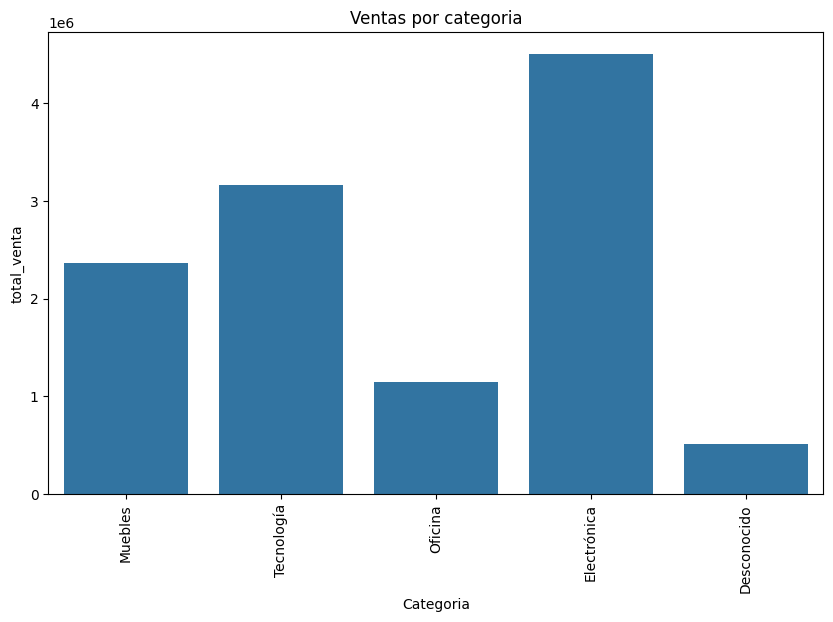

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='categoria', y='total_venta', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title('Ventas por categoria')
plt.xlabel('Categoria')

###CUIDADES CON MAS VENTAS

Text(0.5, 1.0, 'Ciudades con mas ventas')

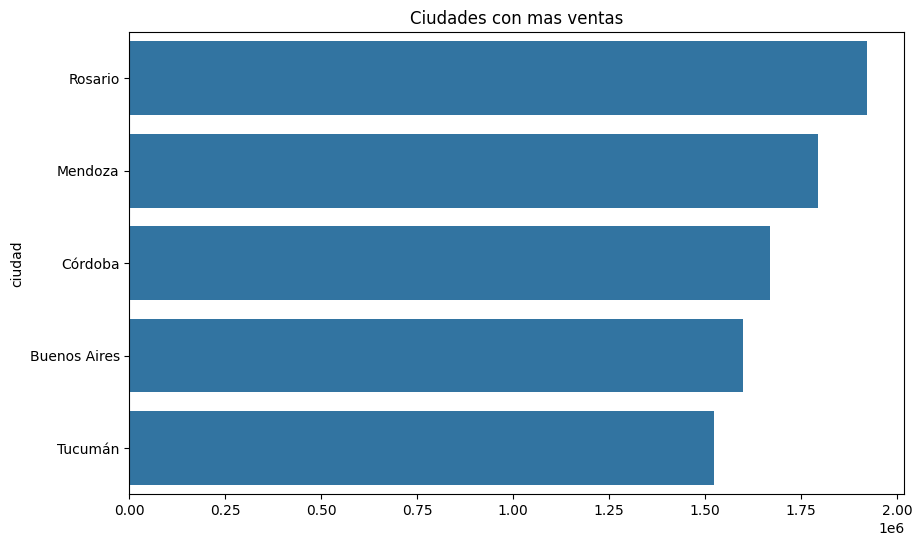

In [51]:
desconocido= "Desconocido"

plt.figure(figsize=(10,6))
topciudades = df[df['ciudad']!= desconcido].groupby('ciudad')['total_venta'].sum().sort_values(ascending=False).head(5)


sns.barplot(y=topciudades.index , x=topciudades.values)
plt.title('Ciudades con mas ventas')

observaciones: como tenemos varias cuidades que en el tratamiendo de datos figuran como "Desconocido" lo excluimos del grafico ya que no sabemos que cuidad puede ser

### VENTAS POR MES

Text(0.5, 0, 'Año/mes')

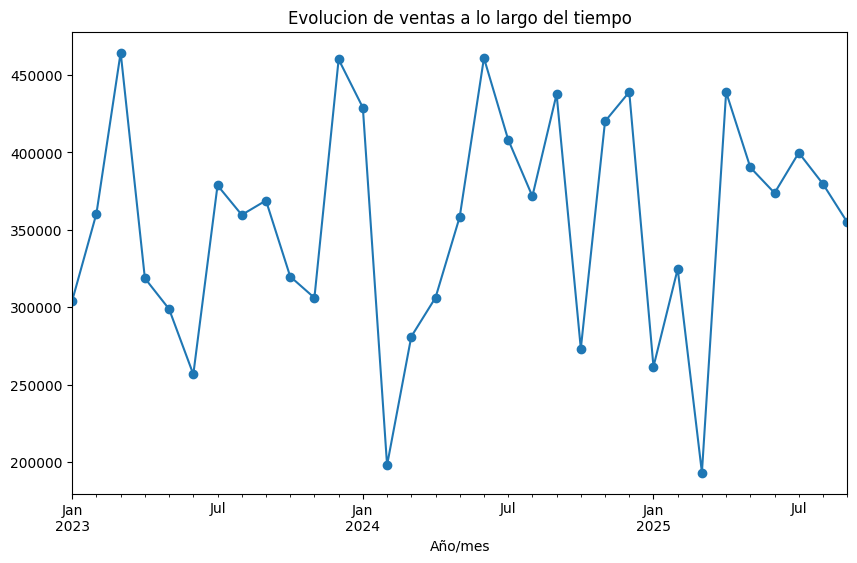

In [53]:
plt.figure(figsize=(10,6))
evolucion_ventas = df.groupby('año/mes')['total_venta'].sum()
evolucion_ventas.plot(marker='o')
plt.title('Evolucion de ventas a lo largo del tiempo')
plt.xlabel('Año/mes')


In [67]:
ventas_por_categoria = df.groupby('categoria')['total_venta'].sum()
participacion_categorias = (ventas_por_categoria / ventas_por_categoria.sum()) * 100

In [70]:
#participacion_categorias = ((df.groupby("categoria")["total_venta"].sum()) /( total_ventas * 100))
categoria_top = df.groupby('categoria')['total_venta'].idxmax()

In [71]:
print("📊 MÉTRICAS RESUMEN")
print(f"💰 Total de ventas: ${total_ventas:,.2f}")
print(f"🧾 Ticket promedio: ${tk_promedio:,.2f}")
print(f"📈 Margen total estimado: ${margen_total:,.2f}")
print(f"🏆 Categoría líder en ventas: {categoria_top}")
print("\n% de participación por categoría:\n", participacion_categorias)

📊 MÉTRICAS RESUMEN
💰 Total de ventas: $11,694,537.10
🧾 Ticket promedio: $6,171.26
📈 Margen total estimado: $2,338,907.38
🏆 Categoría líder en ventas: categoria
Desconocido     577
Electrónica      91
Muebles        1230
Oficina        1562
Tecnología     1776
Name: total_venta, dtype: int64

% de participación por categoría:
 categoria
Desconocido     4.410042
Electrónica    38.494699
Muebles        20.253913
Oficina         9.817645
Tecnología     27.023700
Name: total_venta, dtype: float64


🧾 MÉTRICAS RESUMEN – ANÁLISIS DE VENTAS
📊 Resumen general

Total de ventas: $11.694.537,10

Ticket promedio: $6.171,26

Margen total estimado: $2.338.907,38

Estas cifras reflejan un nivel de ventas sólido con un margen promedio cercano al 20%, lo que sugiere una estructura comercial rentable. El ticket promedio indica un valor medio de transacción estable dentro del rango esperado para el tipo de productos ofrecidos.

🏆 Categoría líder en ventas

Tecnología lidera las ventas con el 27,0 % del total, seguida de Electrónica (38,5 %), Muebles (20,3 %), y Oficina (9,8 %).

El grupo “Desconocido” (4,4 %) representa registros con datos faltantes o mal categorizados, lo que sugiere la necesidad de mejorar la calidad de los datos en el proceso ETL.

📈 Conclusión:
La concentración de ventas en Tecnología y Electrónica (65 % del total) muestra una clara dependencia del segmento tecnológico. Esto puede ser una oportunidad para potenciar esas líneas o diversificar hacia categorías menos representadas como Muebles u Oficina.

💡 Recomendaciones

Limpieza de datos: eliminar o reclasificar la categoría “Desconocido” para mejorar la precisión de las métricas.

Estrategia comercial:

Focalizar esfuerzos en Tecnología y Electrónica (mayor aporte de ingresos).

Evaluar campañas o descuentos en Oficina y Muebles para equilibrar el mix de ventas.

Análisis adicional:

Incorporar métricas de evolución temporal (ventas por mes/trimestre).

Evaluar ticket promedio por categoría para identificar márgenes más rentables.

🧩 Ejemplo de cómo presentarlo en tu README
## 📊 Métricas principales
| Indicador | Valor |
|------------|------------|
| 💰 Total de ventas | $11.694.537,10 |
| 🧾 Ticket promedio | $6.171,26 |
| 📈 Margen total estimado | $2.338.907,38 |

## 🏆 Participación por categoría
| Categoría | Participación (%) |
|------------|------------------|
| Electrónica | 38,49 |
| Tecnología | 27,02 |
| Muebles | 20,25 |
| Oficina | 9,82 |
| Desconocido | 4,41 |

> 💬 *Conclusión:* El 65 % de las ventas se concentran en productos tecnológicos, evidenciando una fuerte dependencia de ese segmento. Se recomienda fortalecer la gestión de datos y diversificar la oferta de categorías.